In [10]:
import pandas as pd 
import numpy as np 




In [11]:
relative_path_URL = "./Desktop/datasets/Housing.csv"

In [12]:
data = pd.read_csv(relative_path_URL)

In [13]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [51]:
test1 = data.loc[0]
test1

longitude              -122.23
latitude                 37.88
housing_median_age        41.0
total_rooms              880.0
total_bedrooms           129.0
population               322.0
households               126.0
median_income           8.3252
median_house_value    452600.0
ocean_proximity       NEAR BAY
income_cat                   5
Name: 0, dtype: object

In [52]:
test1 = data.loc[1]
test1

longitude              -122.22
latitude                 37.86
housing_median_age        21.0
total_rooms             7099.0
total_bedrooms          1106.0
population              2401.0
households              1138.0
median_income           8.3014
median_house_value    358500.0
ocean_proximity       NEAR BAY
income_cat                   5
Name: 1, dtype: object

In [14]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
# it looks like there are some null values 

# total_bedrooms 
# ocean proximity is the nominal categorial data, so it is of type object 

In [17]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [19]:
#EDA 

In [70]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style("dark")


<AxesSubplot: xlabel='longitude', ylabel='Count'>

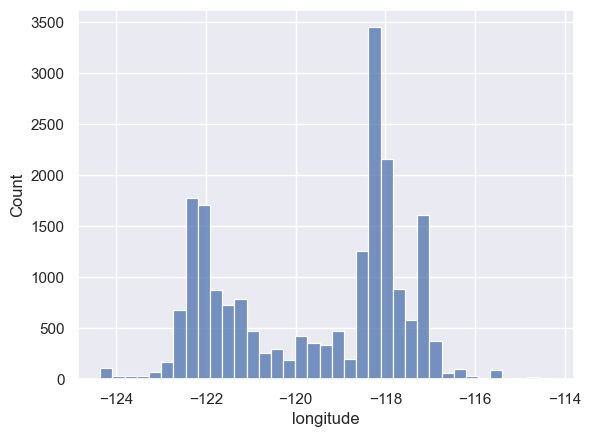

In [27]:
sns.histplot(data["longitude"])

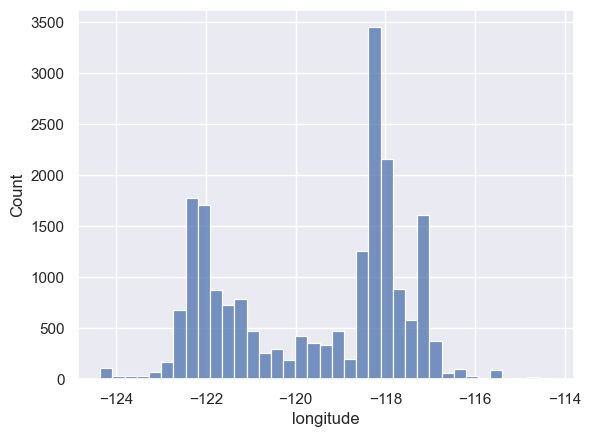

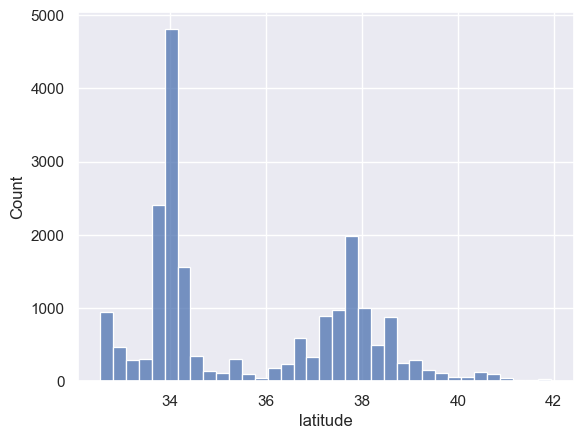

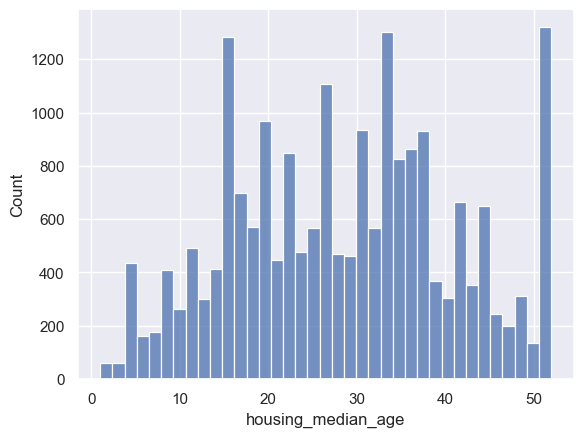

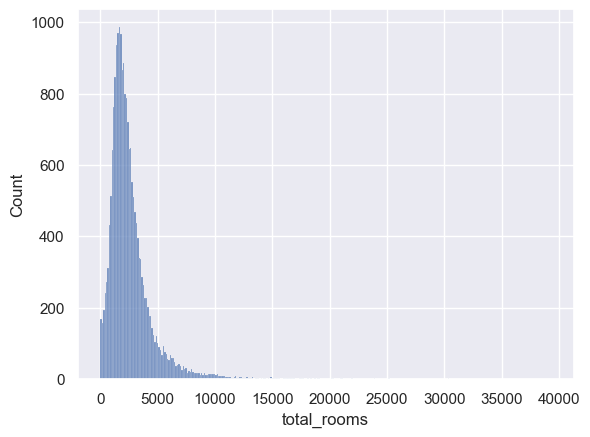

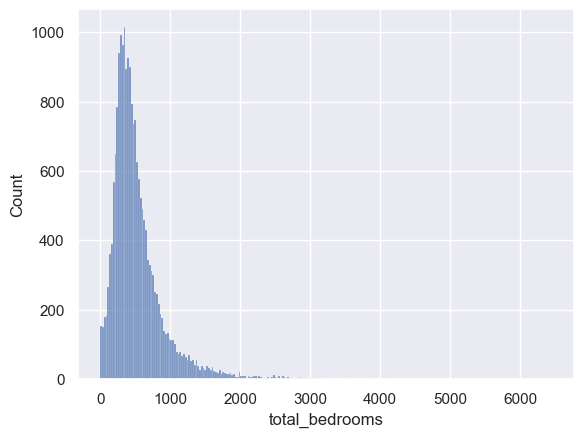

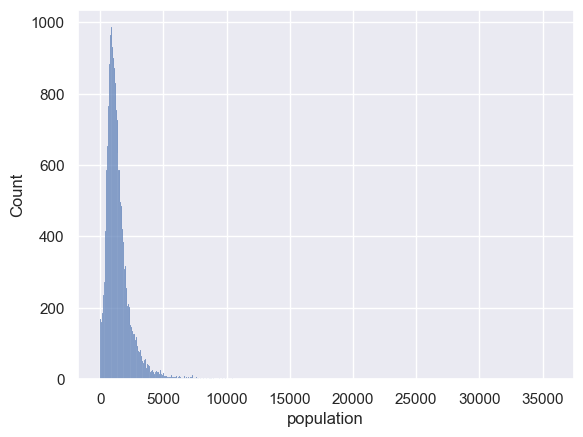

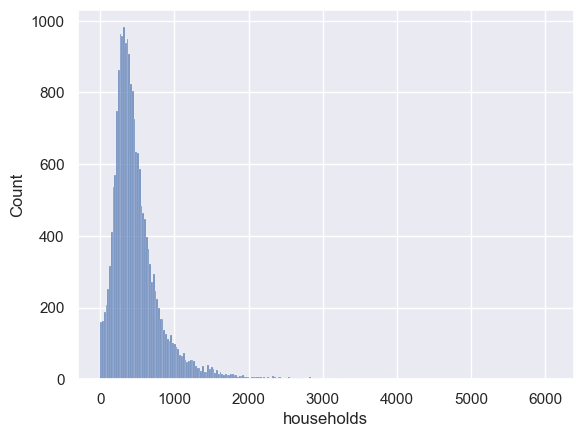

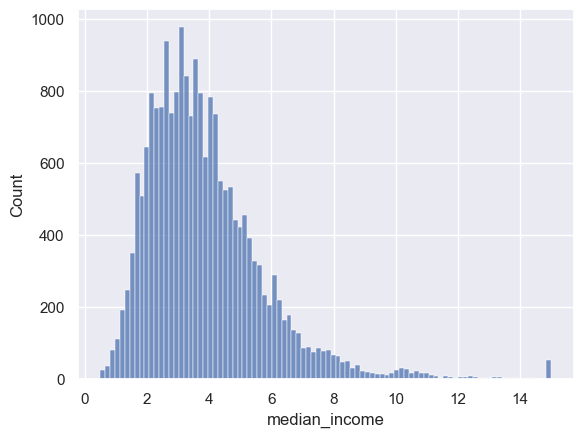

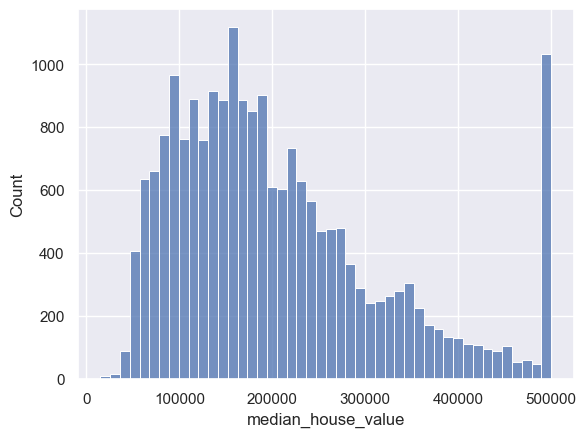

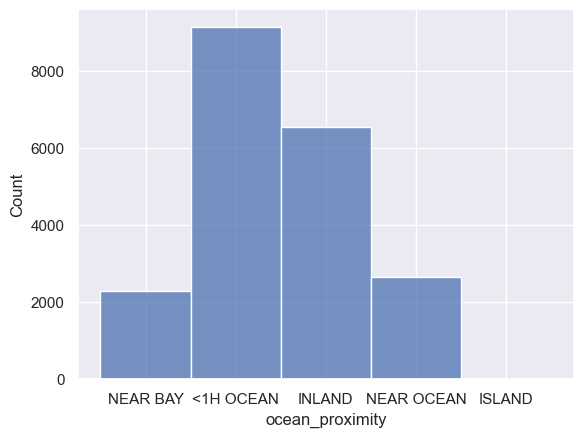

In [32]:
for key in data.keys():
    sns.histplot(data[key])

    plt.show()

In [33]:
# looks like the median income isnt in USD? 
# the caps is 15..... somethings wrong 
# so 1 -> 10,000 dollars 

#they are all tail heavy, negatively skewed data 

In [34]:
# here lets understand what our team needs, then perform feature scaling 

In [35]:
from sklearn.model_selection import train_test_split 



In [36]:
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

In [37]:
# so lets say the median income is a very important attribute , 
# so we want to make sure our training data is representative of the population, and our training data 
# captures the important of the median income 

In [39]:
data["income_cat"] = pd.cut(data["median_income"],
                              bins = [0, 1.5, 3.0, 4.5, 6, np.inf],
                               labels = [1, 2, 3, 4,5])

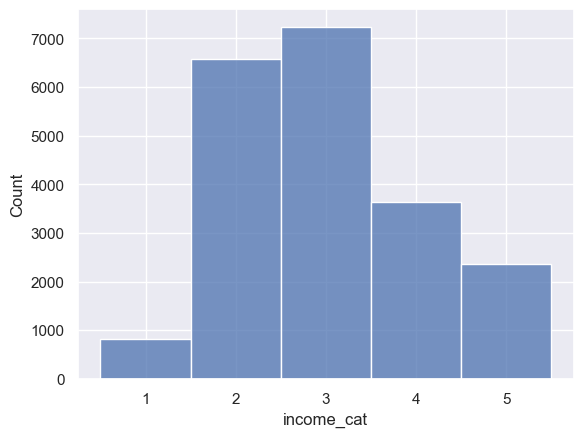

In [41]:
sns.histplot(data["income_cat"])
plt.show()

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit


In [57]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data, data["income_cat"]):

    # literally generates the indices for the test and train set 
    
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
    

16512 4128


In [58]:
strat_test_set.drop("income_cat", axis = 1, inplace = True)

In [59]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


In [60]:
strat_train_set.drop("income_cat", axis = 1, inplace = True)

In [61]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [62]:
housing = strat_train_set.copy()

In [63]:
housingCoordinates = housing[["longitude", "latitude"]]

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

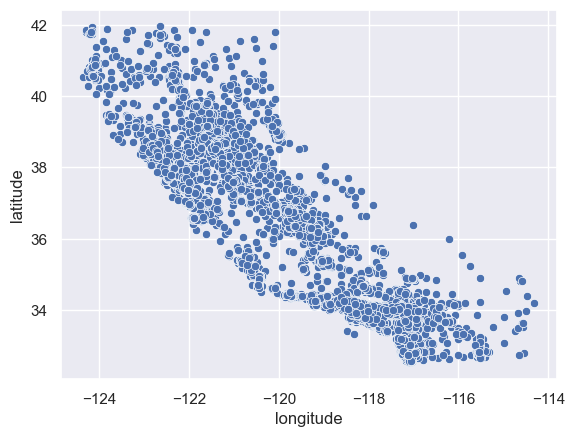

In [66]:
sns.scatterplot(housingCoordinates, x = "longitude", y = "latitude")


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

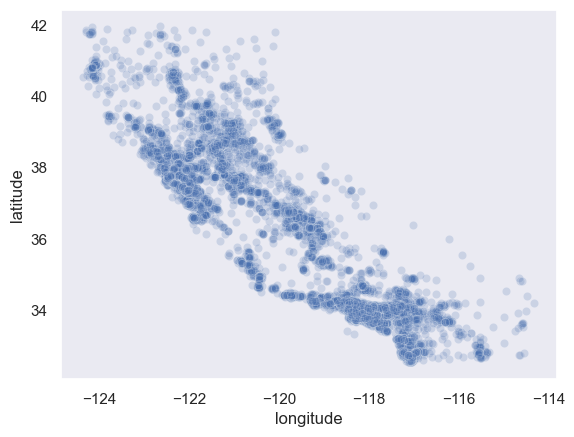

In [73]:
sns.scatterplot(housingCoordinates, x = "longitude", y = "latitude", alpha = 0.2)

In [74]:
# it looks like generally, longitude and latitude are inversely related 
# the shaded areas are the ones with generally more dense areas.... 

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

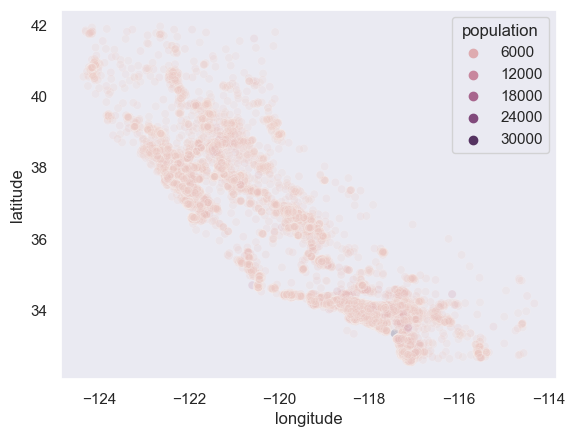

In [77]:
sns.scatterplot(housing, x = "longitude", y = "latitude", alpha = 0.2, hue = "population")

In [90]:
sns.color_palette("ch:start=.2,rot=-.3")

[(0.7643544482681183, 0.8880093482742397, 0.8886224898301243),
 (0.5855957323076926, 0.754577433964653, 0.8084040577328926),
 (0.45077610787066474, 0.5998853667443356, 0.7223838609832016),
 (0.3507228536831824, 0.43905879954313115, 0.6101002657042445),
 (0.25928311223332845, 0.27585597897961833, 0.4514198822688973),
 (0.15399146925967655, 0.128010467998463, 0.24814599518009609)]

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

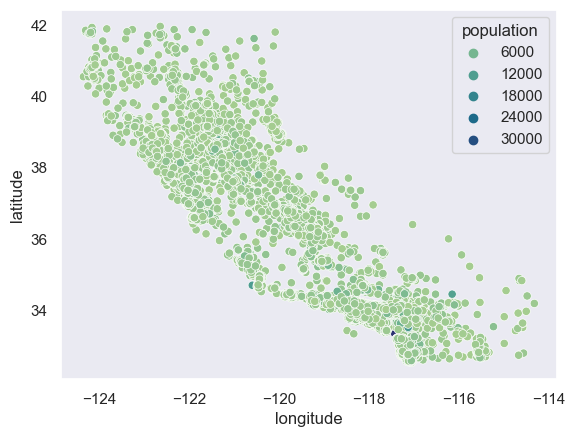

In [94]:

sns.scatterplot(housing, 
                x = "longitude", 
                y = "latitude", 
                 
                hue = "population", 
                palette = "crest"
                )

C:\Users\admin\AppData\Local\Temp\ipykernel_49260\1537582127.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


<AxesSubplot: >

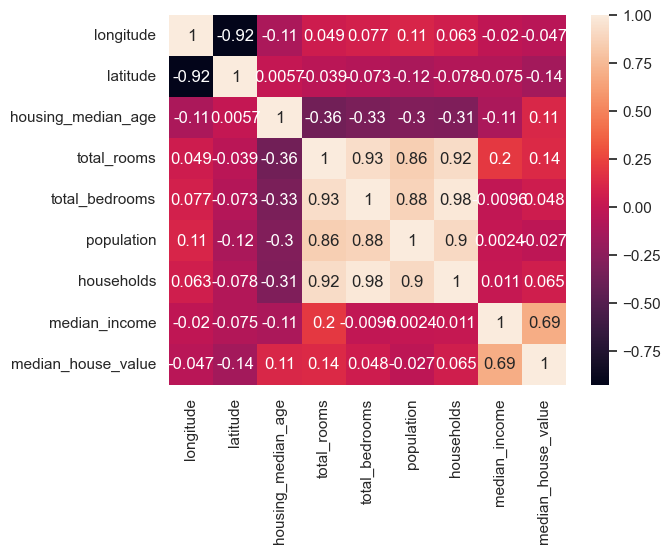

In [99]:
corr_matrix = housing.corr()
sns.heatmap(corr_matrix, annot = True)

In [101]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

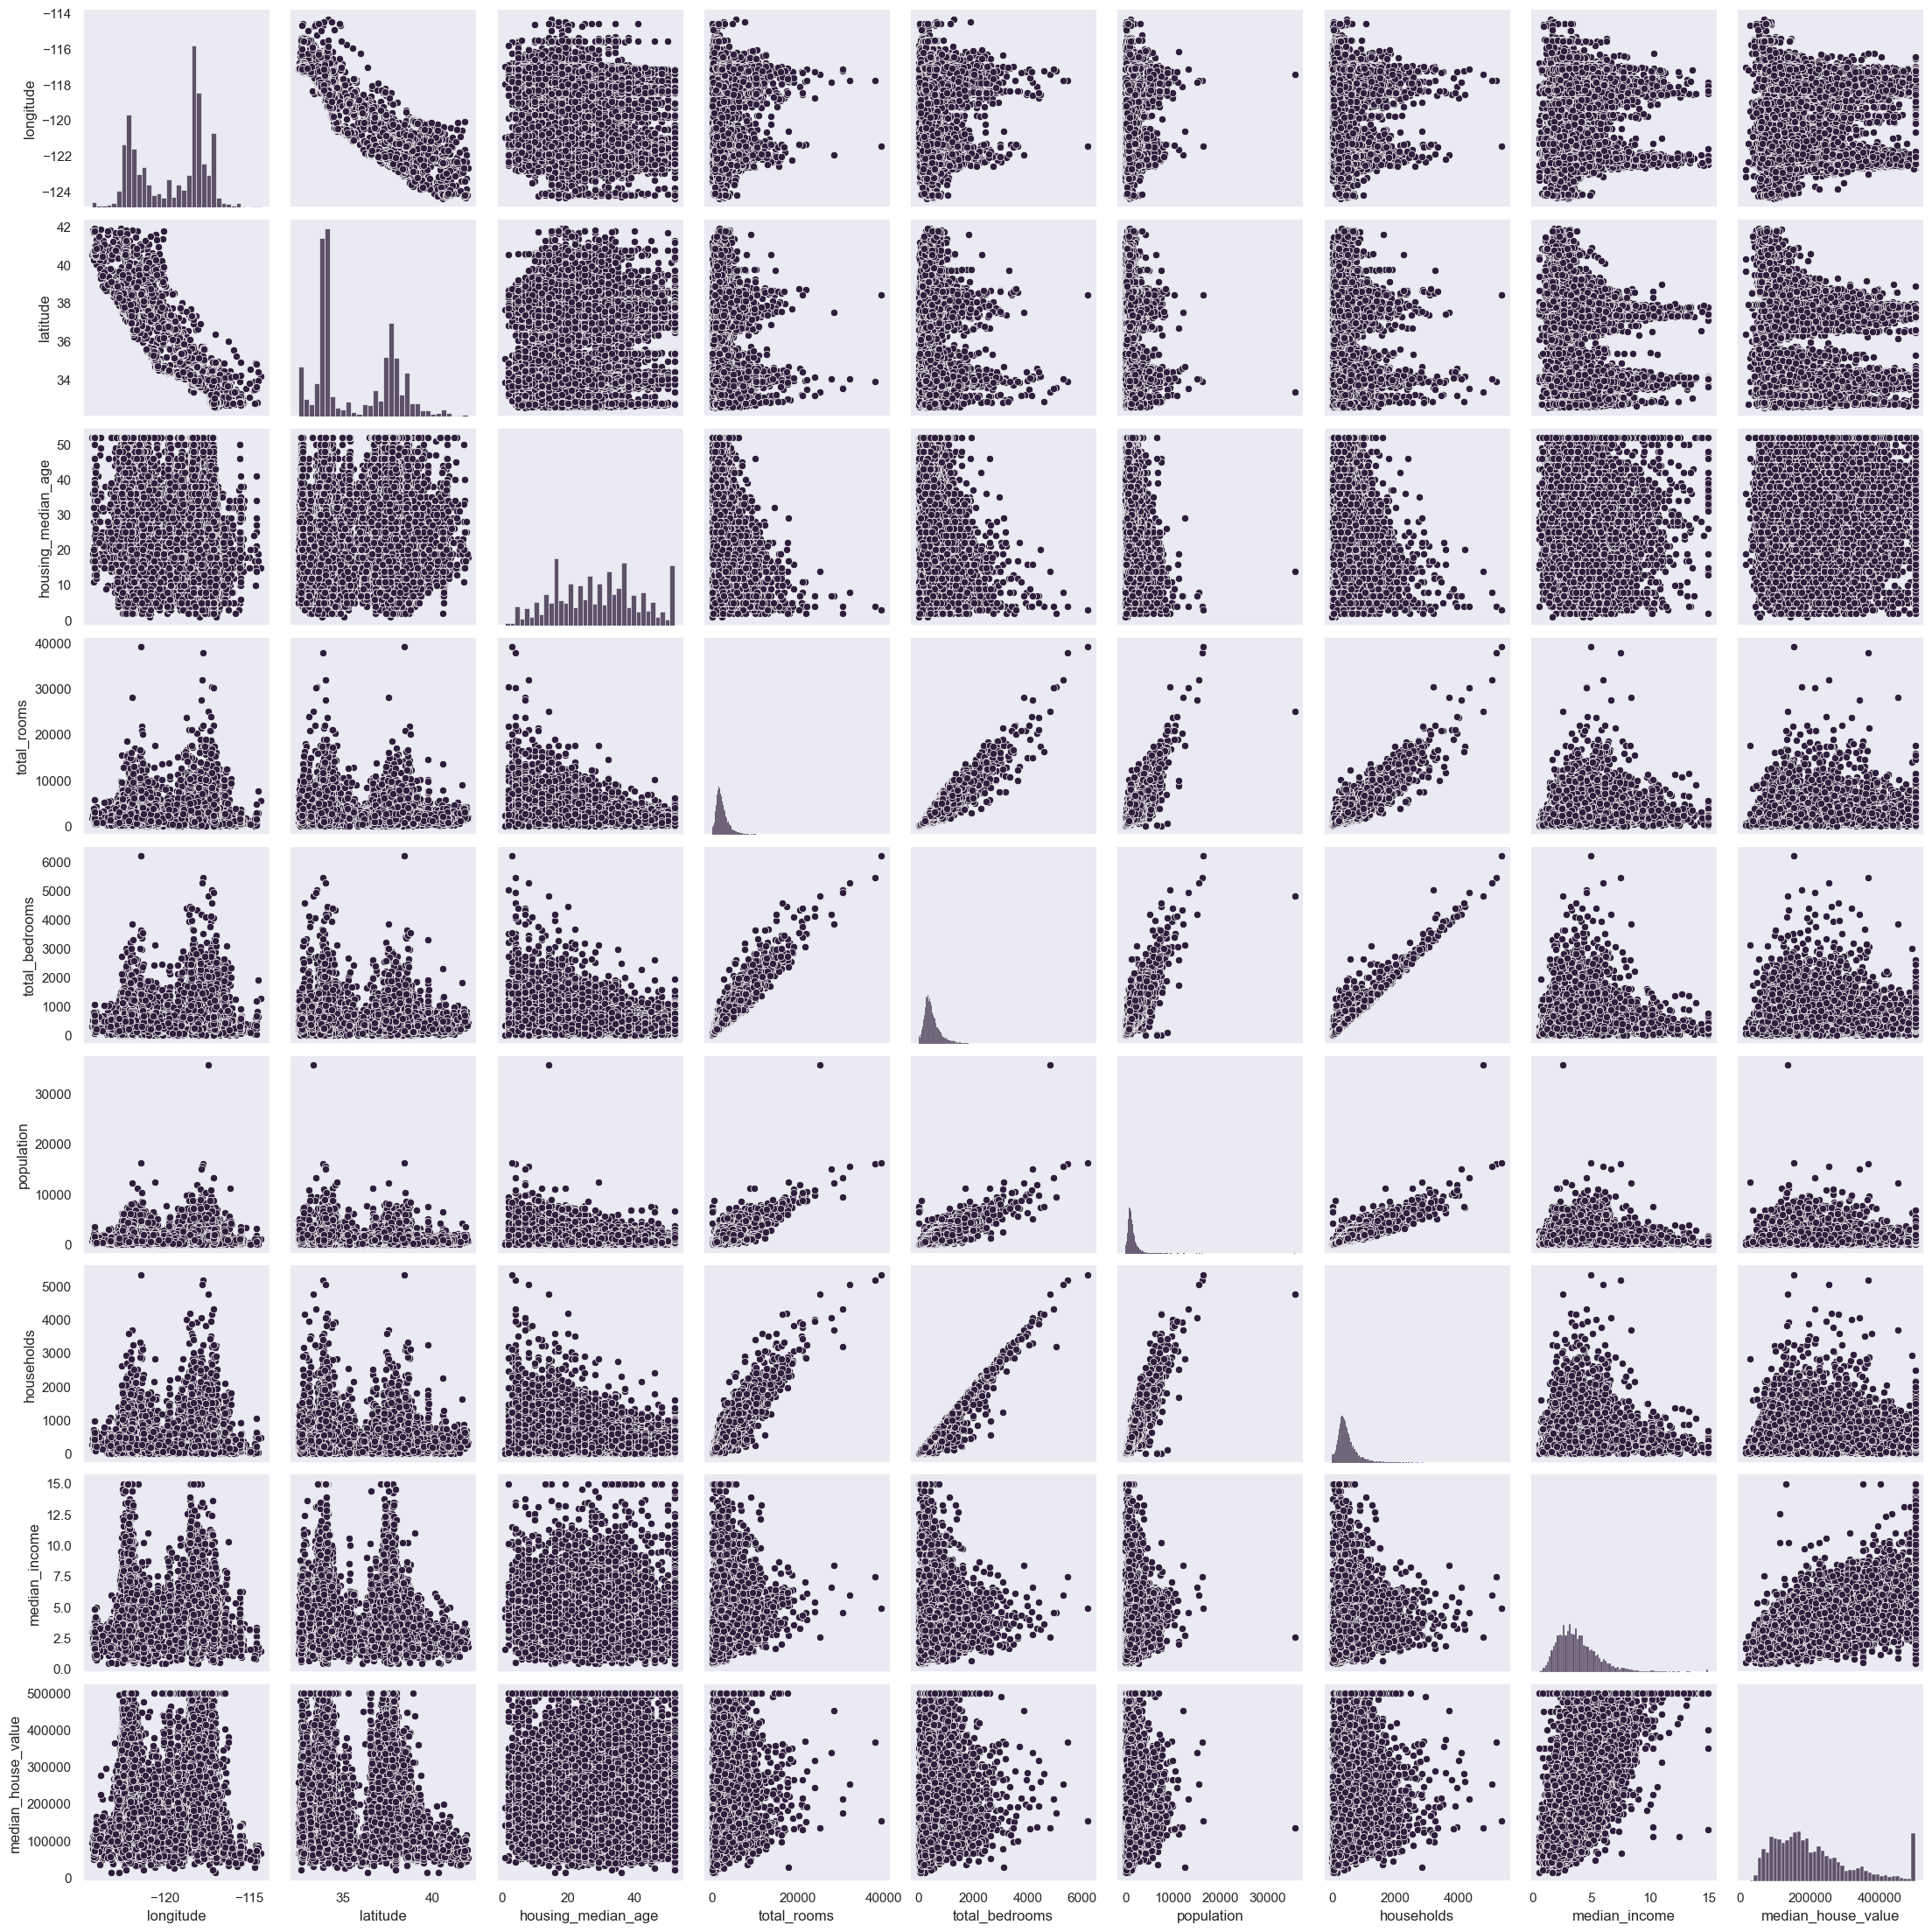

In [109]:
sns.set_palette("mako")
sns.pairplot(housing)
plt.show()

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

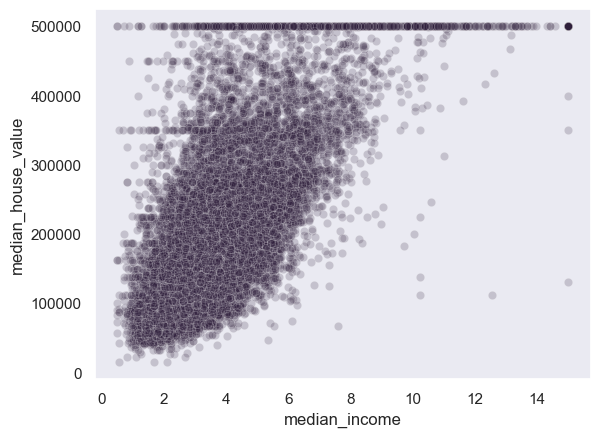

In [111]:

sns.scatterplot(housing, x = "median_income", y = "median_house_value", alpha = 0.2)

In [112]:
# after a certain income , the median house value dont go up anymore. we might want to remove that.

# man my theme of choice is so bad :(


In [113]:
# so remember our missing values back there? 
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [114]:
# yeah the missing total_bedrooms 

In [115]:
#option 1: remove the feature all together 
# option 2: get rid of the data row with the null values 
# option 3 : replace it with the median or mean. 

In [116]:
# here I opt for option 3 
median = housing["total_bedrooms"].median()

In [117]:
housing["total_bedrooms"].fillna(median, inplace = True)

In [118]:
housing_cat = housing[["ocean_proximity"]] # this makes it into a dataframe itself 

In [122]:
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [123]:
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN
